# Toy Examples of Format Features

This notebook demonstrates minimal examples of the following format features:

* [Time dependent right hand sides](#Time-dependent-right-hand-sides)
* [Step functions in the right hand side](#Step-functions-in-the-right-hand-side)
* [Function definition](#Function-definition)

## Time dependent right hand side:

`time_dependent_rhs.yml` implements the ODE 
\begin{align}
\dot{x} &= -\frac{x}{t+1} \\ 
x(0) &= 1
\end{align}
via
```yaml
time:
   variable: t

odes:
    - stateId: x
      rightHandSide: -x/(t+1)
      initialValue: 1
```
The time variable `t` needs to be defined.

In [1]:
import yaml2sbml

yaml_file_basic = 'time_dependent_rhs.yml'
sbml_output_file = 'time_dependent_rhs.xml'

yaml2sbml.yaml2sbml(yaml_file_basic, sbml_output_file)

For the sake of brevity, simulation and plotting is done in a separate function. Details on these steps can be found on [other notebooks](../Lotka_Volterra_python/Lotka_Volterra.ipynb).

In [2]:
from simulation_and_plotting import compile_and_simulate_in_AMICI
import amici.plotting

rdata = compile_and_simulate_in_AMICI(sbml_output_file)

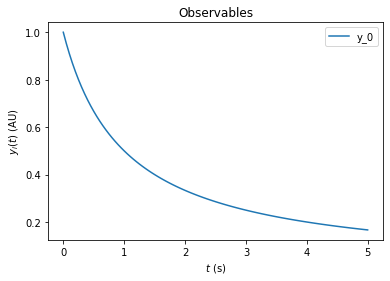

In [3]:
# plot trajectories
amici.plotting.plotObservableTrajectories(rdata)

## Step functions in the right hand side

`step_function.yml` implements the ODE

\begin{align*}
\dot{x} = \begin{cases}
      x , & t < 1 \\
      -x, & \text{otherwise}
    \end{cases}
\end{align*}
via
```yaml
time:
   variable: t

odes:
    - stateId: x
      rightHandSide: piecewise(x, t < 1, -x)
      initialValue: 1
```
More details on `piecewise` functions can be found in the [libsbml documentation](http://sbml.org/Special/Software/libSBML/docs/formatted/python-api/libsbml-math.html).

In [4]:
import yaml2sbml

yaml_file_basic = 'step_function.yml'
sbml_output_file = 'step_function.xml'

yaml2sbml.yaml2sbml(yaml_file_basic, sbml_output_file)

In [5]:
from simulation_and_plotting import compile_and_simulate_in_AMICI
import amici.plotting

rdata = compile_and_simulate_in_AMICI(sbml_output_file)

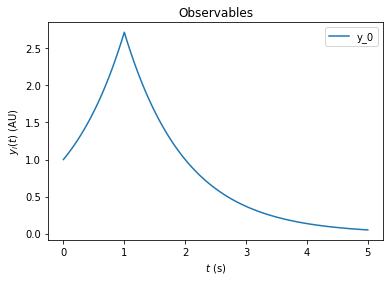

In [6]:
amici.plotting.plotObservableTrajectories(rdata)

## Function definition

`yaml2sbml` allows to define functions, that can be then called in other parts of the model. `functions_in_rhs.yaml` implements the ODE

\begin{align*}
\dot{x}_1 &= f(x_2, 1, 2) \\
\dot{x}_2 &= f(x_1, -1, 0),
\end{align*}

where $f(x, a, b) = a \cdot x + b$
via
```yaml
odes:
    - stateId: x_1
      rightHandSide: f(x_2, 1, 2)
      initialValue: 1

    - stateId: x_2
      rightHandSide: f(x_1, -1, 0)
      initialValue: 1

functions:
    - functionId: f
      arguments: x, a, b
      formula: a * x + b
```

In [10]:
import yaml2sbml

yaml_file_basic = 'functions_in_rhs.yml'
sbml_output_file = 'functions_in_rhs.xml'

yaml2sbml.yaml2sbml(yaml_file_basic, sbml_output_file)

We now follow the usual work flow for simulation and plotting.

In [11]:
from simulation_and_plotting import compile_and_simulate_in_AMICI
import amici.plotting

rdata = compile_and_simulate_in_AMICI(sbml_output_file)

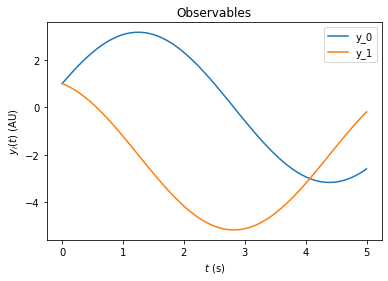

In [12]:
amici.plotting.plotObservableTrajectories(rdata)